# Exploratory Data Analysis of Human Trafficking dataset
- This Dataset was created as a part of Big Data and Policing course project
- Dataset has 302 rows collected from over 2000 News articles
- There are 10 columns
- Data has been collected from year 2014 - 2019

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 10)

In [25]:
data = pd.read_csv("HumanTraffickingDataset - Sheet1.csv")

## Data Cleaning

### Imputing Misssing Data
- Some values were not present in the data. So we've choosed to fill it with global constant.
- However, these are excluded from analysis
- Missing Numerical values are filled with *0*
- Missing Categorical values are filled with *NA*

In [20]:
data['Number of People'] = data['Number of People'].fillna(0)
data['Male Victim'] = data['Male Victim'].fillna(0)
data['Female Victim'] = data['Female Victim'].fillna(0)

In [21]:
data['Number of People'] = data['Number of People'].apply(lambda x: int(x))

In [95]:
data[data['Male Victim'] == '-'] = 0
data['Male Victim'] = data['Male Victim'].fillna(0)
data['Male Victim'] = data['Male Victim'].apply(lambda x: int(x))
data['Number of People'] = data['Number of People'].apply(lambda x: int(x))
data['Female Victim'] = data['Female Victim'].apply(lambda x: int(x))

/home/neeraj/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [26]:
for column in ['Origin', 'Destination', 'Category', 'City', 'url']:
    data[column] = data[column].fillna('NA')
    data[column] = [str(i).lower() for i in data[column]]

In [27]:
data['Origin'] = data['Origin'].replace('us', 'usa')
data['Destination'] = data['Destination'].replace('us', 'usa')

### Creating a general crime type
- We've classified the exploitation into 3 broad categories namely, **Sexual Exploitation, Prostitution and Labour**

In [28]:
sexual_exploitations = [
    'sex', 'sexual exploit', 'sex trafficking', 'sex slave',
    'sexual exploitation', 'sex  trafficking', 'trafficking',
    'cybersex trafficking', 'bride', 'sex trafficker'
]
prostitution = [
    'prostitution', 'prositituition', 'prostiution', 'begging, prostitution'
]
labour = [
    'hired worker', 'smuggling', 'drugs', 'bride', 'slavery', 'migrant',
    'human labour', 'labor', 'bondage labour', 'forced labour', 'child labour',
    'employement', 'bonded labour', 'labour'
]

In [29]:
data['general_type'] = data['Category']
data['general_type'].loc[data['general_type'].isin(
    sexual_exploitations)] = 'sex trafficking'
data['general_type'].loc[data['general_type'].isin(labour)] = 'labour'
data['general_type'].loc[data['general_type'].isin(
    prostitution)] = 'prostitution'

/home/neeraj/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
data['Category'] = data['general_type']
data['Category'] = data['Category'].apply(lambda x: "na" if x == 0 else x)

### Creating a Year Column

In [112]:
data['Year'] = [str(i).split('/')[-1].split('-')[-1] for i in data["Date"]]
data['Year'] = [i.split('20')[-1] for i in data['Year']]
data['Year'] = data['Year'].replace('2107', '17')

## Plots and Analysis

### Plotting Origin and Destination frequency
- Plotting Country of Origin and Destination Country vs the count of victims


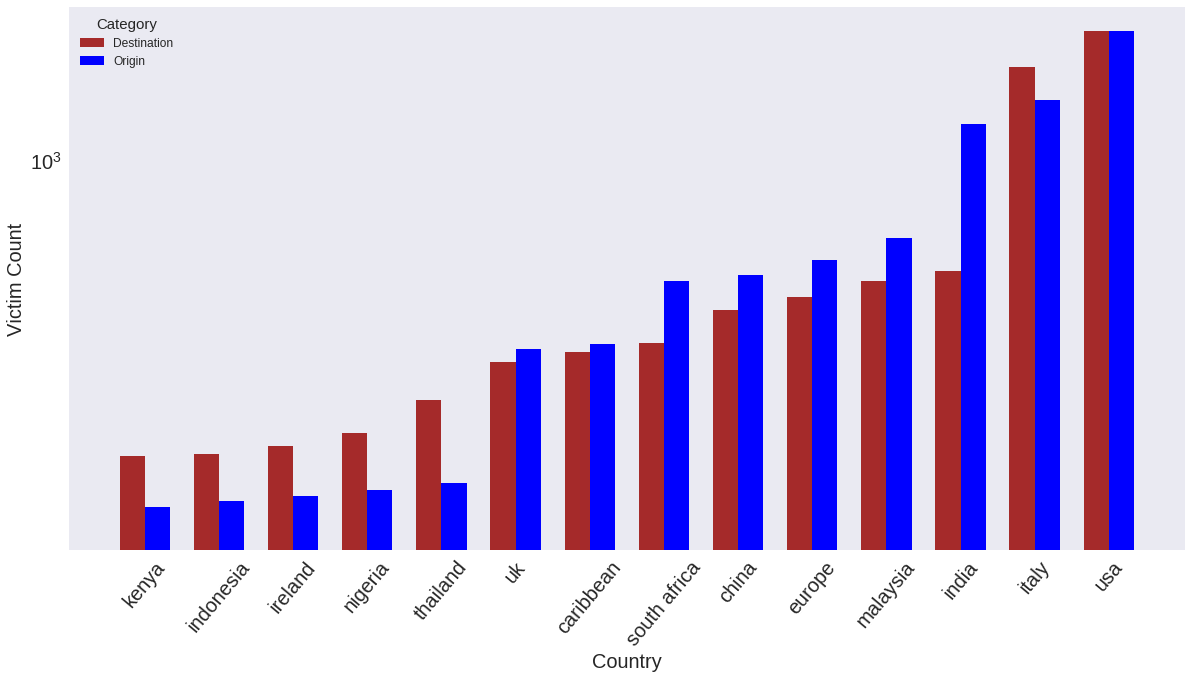

In [23]:
dummy_data = data[(data['Origin'] != 'nan') & (data['Destination'] != 'nan')]
data_destination_grouped = dummy_data[['Number of People',
                                       'Origin']].groupby('Origin')

y = data_destination_grouped.sum()

dummy_data = dummy_data[dummy_data['Destination'] != 'na']
data_destination_grouped = dummy_data[['Number of People',
                                       'Destination']].groupby('Destination')

x = data_destination_grouped.sum()
y = y.sort_values(['Number of People'], ascending=False).iloc[:15, :]
x = x.sort_values(['Number of People'], ascending=False).iloc[:15, :]

ax = plt.subplot(111)
ax.semilogy()
ind = np.arange(15) 
width = 0.34 

plt.style.use('seaborn')
p1 = ax.bar(
    ind[:-1],
    x['Number of People'][1:][::-1],
    width=width,
    color='brown',
    align='center')

plt.style.use('seaborn')
ax.set_xticks(ind + width / 2)
p2 = ax.bar(
    ind[:-1] + width,
    y['Number of People'][1:][::-1],
    width=width,
    color='blue',
    align='center')

ax.set_xticklabels(x.index[:-1][::-1], rotation='vertical', fontsize=20)
ax.legend((p1[0], p2[0]), ('Destination', 'Origin'),
          fontsize='large',
          title='Category',
          title_fontsize=15)
ax.set_ylabel('Victim Count', fontsize=20)
ax.set_xlabel('Country', fontsize=20)

plt.tick_params(labelsize=20)
plt.xticks(rotation=50)
plt.grid(b=None)
plt.rcParams["figure.figsize"] = (20, 10)
plt.savefig(
    './images_our/src_dest_victim_count.svg',
    format='svg',
    dpi=1000,
    transparent=True,
    bbox_inches='tight')
plt.show()

### Observations
- USA seems to hotspot for trafficking, both as source and destination as all collected data shows the cases are US internal only.
- There seems to be high no. of people being trafficked from India


### Plot of Destination Country vs Number of People

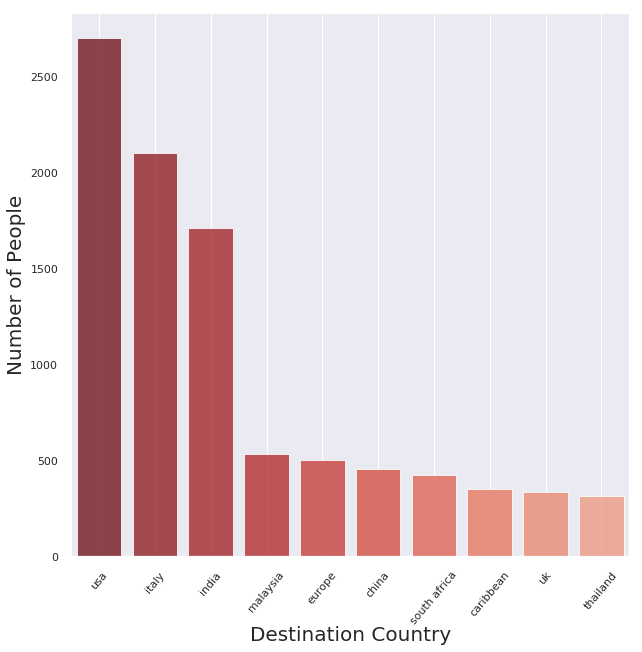

In [141]:
data_destination_grouped = data[['Number of People',
                                 'Destination']].groupby('Destination')
x = data_destination_grouped.sum()
x = x.sort_values(['Number of People'], ascending=[False]).iloc[:10, :]

plt.figure(figsize=(10, 10))
sns.set()

sns.set_palette(sns.color_palette("Reds_r", 15))
ax = sns.barplot(x.index, x['Number of People'], alpha=0.8)
ax.set_xlabel("Year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Terror Attacks")
plt.xlabel('Destination Country', fontsize=20, labelpad=0)
plt.ylabel('Number of People', fontsize=20)
plt.xticks(rotation=50)
plt.savefig(
    './images_our/Destination_country.svg',
    format='svg',
    dpi=1000,
    transparent=True)
plt.grid(b=None)
plt.show()

### Plot between Country of Origin vs Number of People

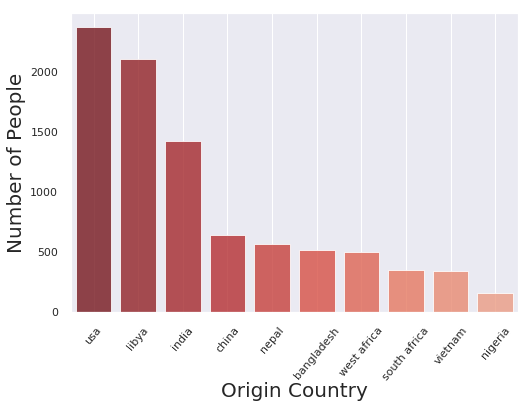

In [91]:
data_destination_grouped = data[['Number of People', 'Origin']]

data_destination_grouped = data_destination_grouped[
    data_destination_grouped['Origin'] != 'na']
data_destination_grouped = data_destination_grouped.groupby('Origin')

x = data_destination_grouped.sum()

x = x.sort_values(['Number of People'], ascending=[False]).iloc[:10, :]

sns.set_palette(sns.color_palette("Reds_r", 15))
ax = sns.barplot(x.index, x['Number of People'], alpha=0.8)
ax.set_xlabel("Year")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Terror Attacks")

plt.xlabel('Origin Country', fontsize=20, labelpad=0)
plt.ylabel('Number of People', fontsize=20)
plt.xticks(rotation=50)
plt.grid(b=None)
plt.savefig(
    './images_our/Origin_country.svg',
    format='svg',
    dpi=1000,
    transparent=True)
plt.show()

### Plot of Gender distribution vs Country 

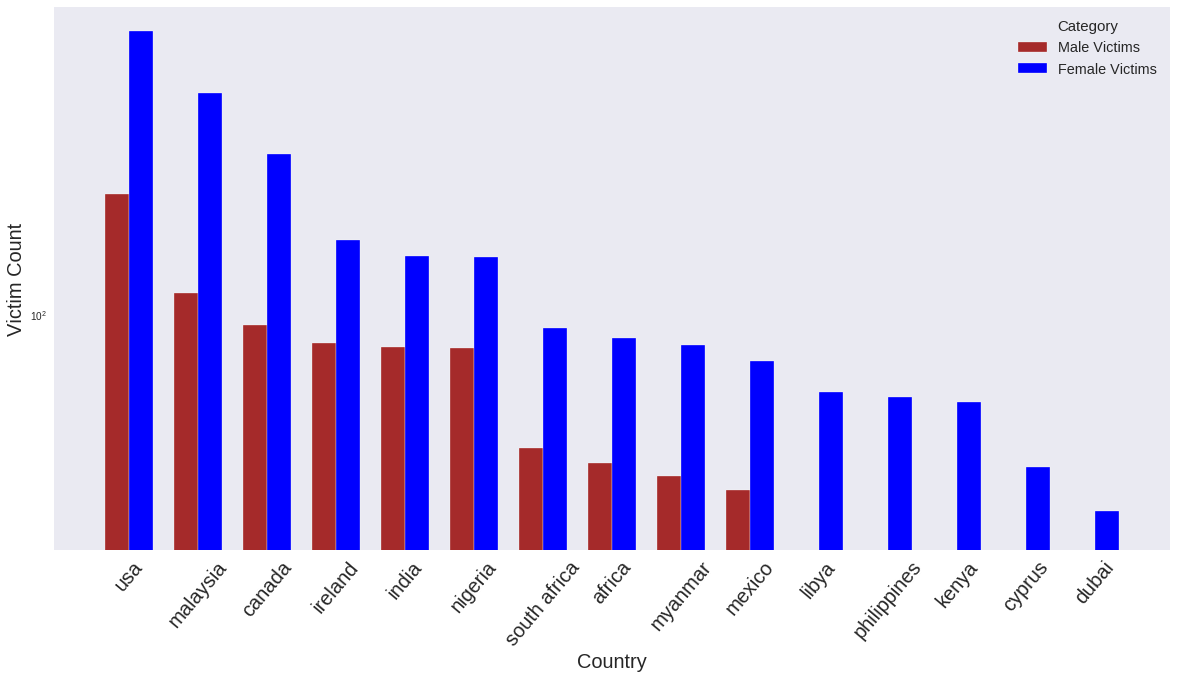

In [148]:
x = data_destination_grouped.sum()
dummy_data = data[(data['Destination'] != 'na')]
data_male_grouped = dummy_data[['Male Victim',
                                'Destination']].groupby('Destination')
x = data_male_grouped.sum()

x = x.sort_values(['Male Victim'], ascending=[False]).iloc[:15, :]

data_female_grouped = data[['Female Victim',
                            'Destination']].groupby('Destination')

y = data_female_grouped.sum()

y = y.sort_values(['Female Victim'], ascending=[False]).iloc[:15, :]

ax = plt.subplot(111)
ax.semilogy()
ind = np.arange(len(x.index))  
width = 0.35  

p1 = ax.bar(ind, x['Male Victim'], width=width, color='brown', align='center')
ax.set_xticks(ind + width / 2)
p2 = ax.bar(
    ind + width, y['Female Victim'], width=width, color='blue', align='center')
ax.set_xticklabels(x.index, rotation='vertical', fontsize=20)

ax.legend((p1[0], p2[0]), ('Male Victims', 'Female Victims'),
          fontsize='large',
          title='Category',
          title_fontsize=15)
ax.set_ylabel('Victim Count', fontsize=20)
plt.xticks(rotation=50)
ax.set_xlabel('Country', fontsize=20)
plt.grid(b=None)
plt.rcParams["figure.figsize"] = (20, 10)
plt.savefig(
    './images_our/Gender_distribution_country.svg',
    format='svg',
    dpi=1000,
    bbox_inches='tight',
    transparent=True)
plt.show()

### Observations:
- Female Victims are larger in almost most of the countries
- Most Number of Female victims are in USA followed by Malayasia and Canada


### Pie Chart depicting distribution of crime categories

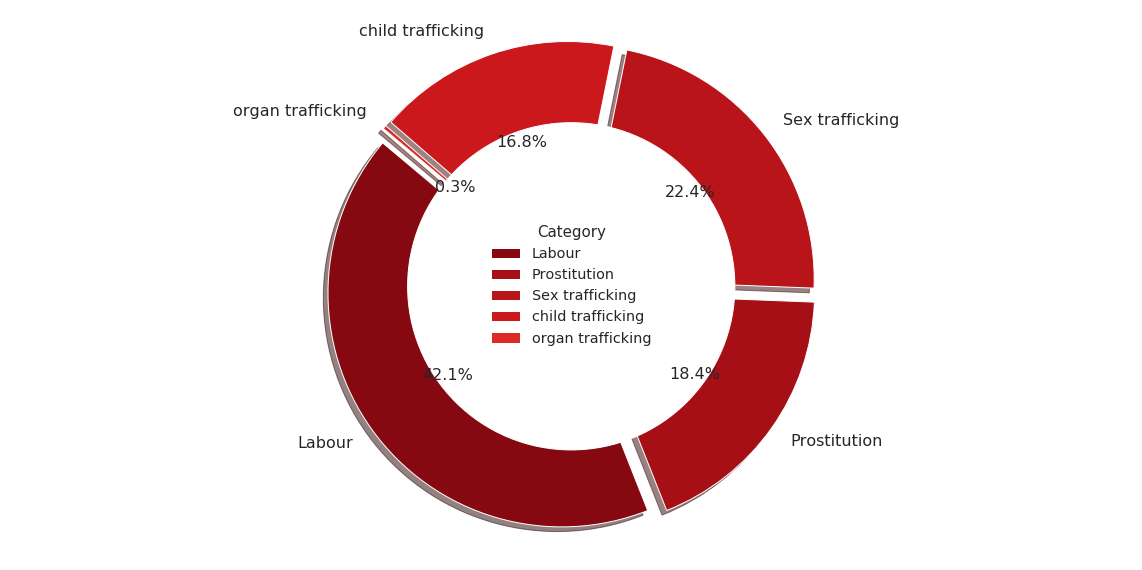

In [106]:
dummy_data = data[data['Category'] != 'na']
data_destination_grouped = dummy_data[['Number of People',
                                       'Category']].groupby('Category')
x = data_destination_grouped.sum()
labels = x.index
sizes = x['Number of People']
explode = [0.05] * len(sizes)
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    textprops={'fontsize': 16})
sns.set()
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
sns.set_palette(sns.color_palette("Reds_r", 15))
plt.axis('equal')
plt.legend(loc="center", fontsize='large', title='Category', title_fontsize=15)
plt.savefig(
    './images_our/Category_distribution_2.svg',
    format='svg',
    dpi=1000,
    bbox_inches='tight',
    transparent=True)
plt.show()

### Observations:
- Almost 40% of the cases are labor related
- Other prominent areas are sex trafficking and prostitution
- Around 17% of the cases are of child trafficking


### Pie Chart depicting crime distributions over years

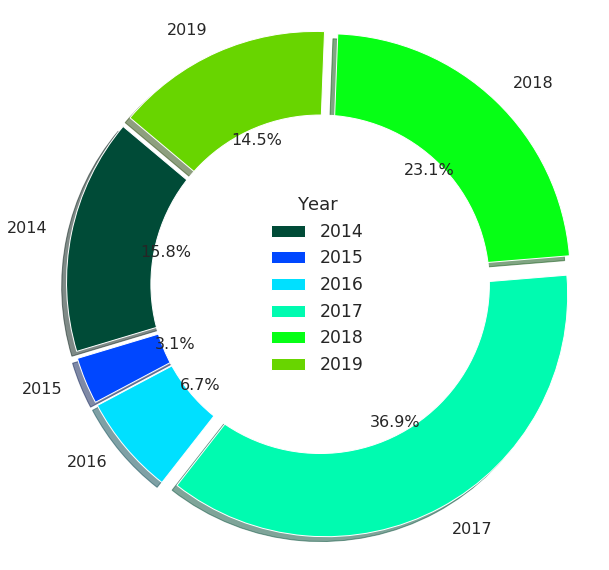

In [116]:
data_destination_grouped = data[['Number of People', 'Year']].groupby('Year')
x = data_destination_grouped.sum()

plt.figure(figsize=(10, 10))
labels = x.index[1:-1]
labels = ["20" + i for i in labels]
sizes = x['Number of People'][1:-1]
explode = [0.05] * len(sizes)

plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    textprops={'fontsize': 16})
sns.set()
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
sns.set_palette(sns.color_palette("gist_ncar", 15))
plt.axis('equal')
plt.legend(
    loc="center",
    fontsize='x-large',
    shadow=True,
    title='Year',
    borderpad=1,
    title_fontsize=18)
plt.savefig(
    './images_our/Year_wise_distribution.svg',
    format='svg',
    dpi=1000,
    bbox_inches='tight',
    transparent=True)
plt.show()

### Observations:
- 2017 has most numbers of crime reported
- However 2019, as of APRIL, still accounts for almost 15% of crimes